# The Bernoulli, Binomial and its Likelihood

In [82]:
import numpy as np
from matplotlib import pyplot as plt
from math import factorial, log

## The Bernoulli Distribution
Tossing a coin: The event that it lands heads, i.e. success, is denoted $Y=1$, tails is $Y=0$. The probability of a success is given by the parameter $0\geq \theta \leq 1$: $p(Y=1)=\theta$ and $p(Y=0)=1-\theta$. This is the Bernoulli distribution - or we can say $Y\sim\text{Ber}(\theta)$: the random variable $Y$ is Bernoulli-distributed. The probability mass function (pmf)
$$\text{Ber}(y;\theta)=
\begin{cases}
    \theta,& \text{if } y=1\\
    1-\theta,& \text{if } y=0
\end{cases}$$
This can also be expressed as
$$\text{Ber}(y;\theta)=\theta^y(1-\theta)^{1-y}\text{ for }y \in \{0,1\}$$

In [63]:
def bernoulli(y, theta):
    return theta**y*(1-theta)**(1-y)

In [68]:
ys = np.array([0,1])
pmf_bernoulli_p2 = [bernoulli(y, 0.2) for y in ys]
pmf_bernoulli_p5 = [bernoulli(y, 0.5) for y in ys]
pmf_bernoulli_p9 = [bernoulli(y, 0.9) for y in ys]

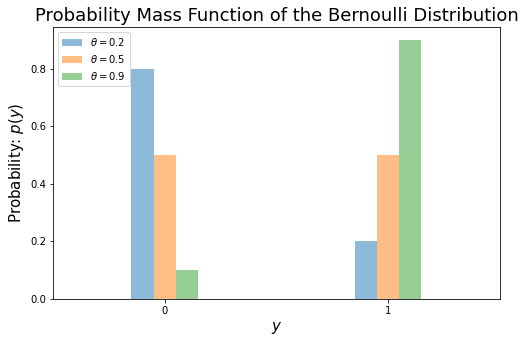

In [79]:
fig, ax = plt.subplots(figsize=[8, 5])

# Width of a bar 
width = 0.1

ax.bar(ys-width, pmf_bernoulli_p2, width=width, alpha=0.5, label='$\\theta =0.2$')
ax.bar(ys, pmf_bernoulli_p5, width=width, alpha=0.5, label='$\\theta =0.5$')
ax.bar(ys+width, pmf_bernoulli_p9, width=width, alpha=0.5, label='$\\theta =0.9$')

ax.set_xlim([-0.5,1.5])
ax.set_xticks(ys)

ax.set_xlabel('$y$', fontsize=15)
ax.set_ylabel('Probability: $p(y)$', fontsize=15)

ax.set_title('Probability Mass Function of the Bernoulli Distribution', fontsize=18)
ax.legend(loc=2)

plt.show()

## The Binomial Distribution
Tossing the coin $N$ times produces $N$ Bernoulli events $y_n\sim\text{Ber}(y_n;\theta), \text{ for }n=1:N$. With the total number of heads 
$$s=\sum_{n=1}^N \mathbb{I}(y_n=1)$$
the probability mass function of the binomial distribution is 
$$p(s|N,\theta)=\text{Bin}(s|N,\theta)={N \choose s}\theta^{s}(1-\theta)^{N-s}$$
with the binomial coefficient:
$${N \choose k}=\frac{N!}{(N-k)!k!}$$
the number of ways to choose $k$ items from $N$

In [9]:
def binomial(s, N, theta):
    return factorial(N)/(factorial(N-s)*factorial(s)) * theta**s * (1 - theta)**(N-s)

In [20]:
trials = 10

successes = [s for s in range(trials+1)]
pmf_binomial_p5 = [binomial(s, trials, 0.5) for s in successes]
pmf_binomial_p2 = [binomial(s, trials, 0.2) for s in successes]
pmf_binomial_p9 = [binomial(s, trials, 0.9) for s in successes]

The probabilities sum to 1.0:

In [31]:
print(np.sum(pmf_p5))
print(np.sum(pmf_p2))
print(np.sum(pmf_p9))

1.0
1.0000000000000007
1.0


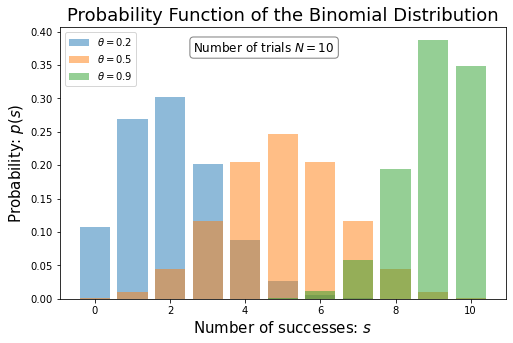

In [58]:
fig, ax = plt.subplots(figsize=[8, 5])

ax.bar(successes, pmf_p2, alpha=0.5, label='$\\theta =0.2$')
ax.bar(successes, pmf_p5, alpha=0.5, label='$\\theta =0.5$')
ax.bar(successes, pmf_p9, alpha=0.5, label='$\\theta =0.9$')

ax.set_xlabel('Number of successes: $s$', fontsize=15)
ax.set_ylabel('Probability: $p(s)$', fontsize=15)

ax.set_title('Probability Function of the Binomial Distribution', fontsize=18)
ax.legend(loc=2)

textstr = 'Number of trials $N=${N_par:}'.format(N_par=trials)
ax.text(0.3, 0.95, textstr, transform=ax.transAxes, fontsize=12,
        verticalalignment='top', bbox={'boxstyle':'round', 'facecolor':'none', 'edgecolor':'grey'})

plt.show()

## The Likelihood of the Binomial Distribution
The likelihood function of the binomial distribution is a function of the parameter $\theta$ - the $s$ and $N$ correspond to the observed data: 
$$\mathcal{L}(p|N,s)={N \choose s}\theta^{s}(1-\theta)^{N-s}$$

The difference to the probability function $p(s|N,\theta)$ is the conditioning of the left hand side. The probability function returns probabilities of the data, given the sample size and the parameter $\theta$, while the likelihood function gives the relative likelihoods for different values of the parameter, given the sample size and the observed values.

The conceptual difference is that probability attaches to possible results, while likelihood attaches to the model or its (hyper-)parameter(s), i.e. the hypothesis.  
Possible results are mutually exclusive and exhaustive: Suppose a model predicts the outcome of each of 10 tosses of a coin. There are only 11 possible results (0 to 10 correct predictions). The actual result will always be one and only one of the possible results. Thus, the probabilities that attach to the possible results must sum to 1.  
Models with their (hyper-)parameters (hypotheses) are neither mutually exclusive nor exhaustive: Two completely different models can produce the same output and in practice it is hardly possible to construct all possible models.

The likelihoods attached to the models or parameters do not have any meaning in and of themselves; only the relative likelihoods of different models or parameters.

Example: The likelihood function of the binomial distribution given 10 trials and different number of observed successes:

In [49]:
ps = np.linspace(0.0, 1.0, 100)
l_2 = [binomial(s=2, N=trials, theta=p) for p in ps]
l_5 = [binomial(s=5, N=trials, theta=p) for p in ps]
l_9 = [binomial(s=9, N=trials, theta=p) for p in ps]

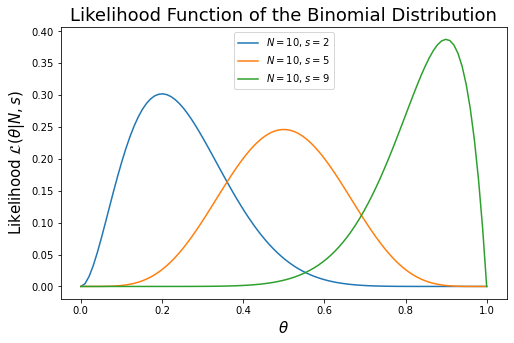

In [61]:
fig, ax = plt.subplots(figsize=[8, 5])

ax.plot(ps, l_2, label='$N=${a:}, $s=${b:}'.format(a=trials, b=2))
ax.plot(ps, l_5, label='$N=${a:}, $s=${b:}'.format(a=trials, b=5))
ax.plot(ps, l_9, label='$N=${a:}, $s=${b:}'.format(a=trials, b=9))

ax.set_xlabel('$\\theta$', fontsize=15)
ax.set_ylabel('Likelihood $\mathcal{L}(\\theta|N,s)$', fontsize=15)

ax.set_title('Likelihood Function of the Binomial Distribution', fontsize=18)
ax.legend(loc=9)

plt.show()

Given that we observed 2 successes in 10 tries, the probability parameter $\theta$ of the binomial distribution from which we are drawing $\text{Bin}(2|10,\theta)$ is very unlikely to be 0.6. It is much more likely to be 0.2:

In [102]:
binomial(s=2, N=trials, theta=0.6)

0.010616832000000005

In [103]:
binomial(s=2, N=trials, theta=0.2)

0.3019898880000002

But a value of 0.3 is by no means unlikely - the ratio of the likelihood at $\theta=0.2$ to the likelihood at $\theta=0.4$ is only 2.5:

In [111]:
binomial(s=2, N=trials, theta=0.2)/binomial(s=2, N=trials, theta=0.4)

2.4971803078798986

## The Log-Likelihood
The log-likelihood of the binomial model:
$$\log_e\left(\mathcal{L}\right)=\log_e\left(\mathcal{L}(p|N,s)\right)=\log_e{N \choose s}+s\log_e(\theta)+(N-s)\log_e(1-\theta)$$

In [83]:
def logl(s, N, theta):
    return log(factorial(N))-log(factorial(N-s)) - log(factorial(s)) + s*log(theta) + (N-s)*log(1-theta)

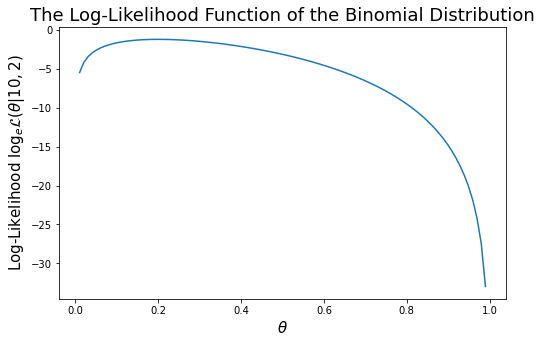

In [96]:
logl_2 = np.array([logl(s=2, N=trials, theta=p) for p in ps[1:-1]])

fig, ax = plt.subplots(figsize=[8, 5])

ax.plot(ps[1:-1], logl_2)

ax.set_xlabel('$\\theta$', fontsize=15)
ax.set_ylabel('Log-Likelihood $\\log_e\\mathcal{L}(\\theta|10, 2)$', fontsize=15)

ax.set_title('The Log-Likelihood Function of the Binomial Distribution', fontsize=18)
# ax.legend(loc=9)

plt.show()

minimising the negative log-likelihood is equivalent to maximising the likelihood

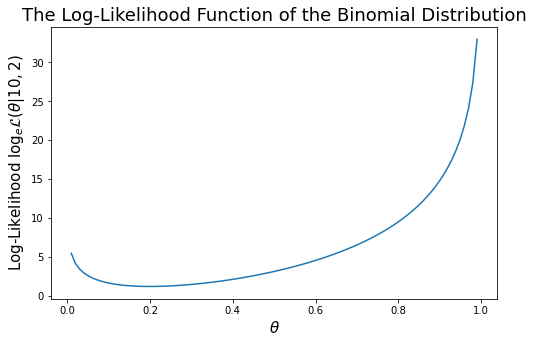

In [97]:
neg_logl_2 = -logl_2

fig, ax = plt.subplots(figsize=[8, 5])

ax.plot(ps[1:-1], neg_logl_2)

ax.set_xlabel('$\\theta$', fontsize=15)
ax.set_ylabel('Log-Likelihood $\\log_e\\mathcal{L}(\\theta|10, 2)$', fontsize=15)

ax.set_title('The Log-Likelihood Function of the Binomial Distribution', fontsize=18)
# ax.legend(loc=9)

plt.show()

## References
[1] Murphy K.P.: Probabilistic Marchine Learning - An Introduction (2022), pp. 47-48.  
[2] Gallistel C. R.: Bayes for Beginners: Probability and Likelihood, (online) https://www.psychologicalscience.org/observer/bayes-for-beginners-probability-and-likelihood